Thu Aug 31 18:10:48 2023

fem1d_test
  Python version: 3.9.13
  Given the two point boundary value problem:
    -u = x * ( x + 3 ) * exp ( x ), 0 < x < 1
  with boundary conditions
    u(0) = 0, u(1) = 0,
  demonstrate how the finite element method can be used to
  define and compute a discrete approximation to the solution.

  Nodes:

  0  -2.000000
  1  -1.920000
  2  -1.840000
  3  -1.760000
  4  -1.680000
  5  -1.600000
  6  -1.520000
  7  -1.440000
  8  -1.360000
  9  -1.280000
  10  -1.200000
  11  -1.120000
  12  -1.040000
  13  -0.960000
  14  -0.880000
  15  -0.800000
  16  -0.720000
  17  -0.640000
  18  -0.560000
  19  -0.480000
  20  -0.400000
  21  -0.320000
  22  -0.240000
  23  -0.160000
  24  -0.080000
  25  0.000000
  26  0.080000
  27  0.160000
  28  0.240000
  29  0.320000
  30  0.400000
  31  0.480000
  32  0.560000
  33  0.640000
  34  0.720000
  35  0.800000
  36  0.880000
  37  0.960000
  38  1.040000
  39  1.120000
  40  1.200000
  41  1.280000
  42  1.360000
  

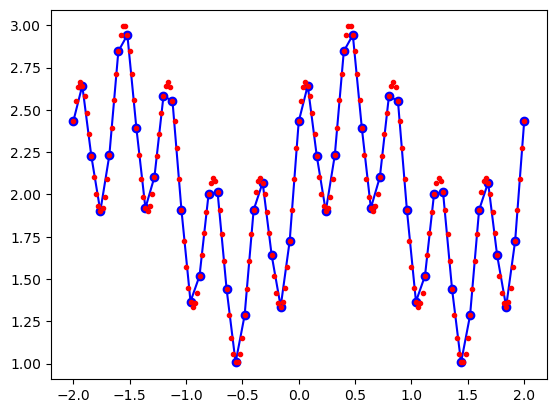


fem1d_test():
  Normal end of execution.
Thu Aug 31 18:10:48 2023


In [14]:
def fem1d_test ( ):

#*****************************************************************************80
#
## fem1d_test() solves a 1D boundary value problem using finite elements.
#
#  Discussion:
#
#    The PDE is defined for 0 < x < 1:
#      -u'' = f
#    with right hand side
#      f(x) = -(exact(x)'') 
#    and boundary conditions
#      u(0) = exact(0),
#      u(1) = exact(1).
#
#    The exact solution is:
#      exact(x) = x * ( 1 - x ) * exp ( x )
#    The boundary conditions are
#      u(0) = 0.0 = exact(0.0),
#      u(1) = 0.0 = exact(1.0).
#    The right hand side is:
#      f(x) = x * ( x + 3 ) * exp ( x ) = - ( exact''(x) )
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license. 
#
#  Modified:
#
#    13 September 2014
#
#  Author:
#
#    John Burkardt
#
  import matplotlib.pyplot as plt
  import numpy as np
  import platform
  import scipy.linalg as la

  print ( '' )
  print ( 'fem1d_test' )
  print ( '  Python version: %s' % ( platform.python_version ( ) ) )
  print ( '  Given the two point boundary value problem:' )
  print ( '    -u'' = x * ( x + 3 ) * exp ( x ), 0 < x < 1' )
  print ( '  with boundary conditions' )
  print ( '    u(0) = 0, u(1) = 0,' )
  print ( '  demonstrate how the finite element method can be used to' )
  print ( '  define and compute a discrete approximation to the solution.' )
#
#  Define the mesh, N+1 points between A and B.
#  These will be X[0] through X[N].
#
  a = -2.0
  b = 2.0
  n = 50
  x = np.linspace ( a, b, n + 1 )

  print ( '' )
  print ( '  Nodes:' )
  print ( '' )
  for i in range ( 0, n + 1 ):
    print ( '  %d  %f' %( i, x[i] ) )
#
#  Set a 3 point quadrature rule on the reference interval [0,1].
#
  ng = 3

  xg = np.array ( ( \
    0.112701665379258311482073460022, \
    0.5, \
    0.887298334620741688517926539978 ) )

  wg = np.array ( ( \
    5.0 / 18.0, \
    8.0 / 18.0, \
    5.0 / 18.0 ) )
#
#  Compute the system matrix A and right hand side RHS.
#
  A = np.zeros ( ( n + 1, n + 1 ) )
  rhs = np.zeros ( n + 1 )
#
#  Look at element E: (0, 1, 2, ..., N-1).
#
  for e in range ( 0, n ):

    xl = x[e]
    xr = x[e+1]
#
#  Consider quadrature point Q: (0, 1, 2 ) in element E.
#
    for q in range ( 0, ng ):
#
#  Map XG and WG from [0,1] to
#      XQ and QQ in [XL,XR].
#
      xq = xl + xg[q] * ( xr - xl )
      wq = wg[q] * ( xr - xl )
#
#  Consider the I-th test function PHI(I,X) and its derivative PHI'(I,X).
#
      for i_local in range ( 0, 2 ):
        i = i_local + e

        if ( i_local == 0 ):
          phii = ( xq - xr ) / ( xl - xr )
          phiip = 1.0 / ( xl - xr )
        else:
          phii = ( xq - xl ) / ( xr - xl )
          phiip = 1.0 / ( xr - xl )

        rhs[i] = rhs[i] + wq * phii * rhs_fn ( xq )
#
#  Consider the J-th basis function PHI(J,X) and its derivative PHI'(J,X).
#  (It turns out we don't need PHI for this particular problem, only PHI')
#
        for j_local in range ( 0, 2 ):
          j = j_local + e

          if ( j_local == 0 ):
            phijp = 1.0 / ( xl - xr )
          else:
            phijp = 1.0 / ( xr - xl )

          A[i][j] = A[i][j] + wq * phiip * phijp
#
#  Modify the linear system to enforce the left boundary condition.
#
  A[0,0] = 1.0
  A[0,1:n+1] = 0.0
  rhs[0] = exact_fn ( x[0] )
#
#  Modify the linear system to enforce the right boundary condition.
#
  A[n,n] = 1.0
  A[n,0:n] = 0.0
  rhs[n] = exact_fn ( x[n] )
#
#  I wanted to check the matrix and right hand side so I printed them.
#  I turned the printing off using 'False' as the condition.
#
  if False:
    print ( '' )
    print ( '  Matrix and RHS:' )
    print ( '' )
    for i in range ( 0, n + 1 ):
      for j in range ( 0, n + 1 ):
        print ( '  %f' % ( A[i,j] ) ),
      print ( '  %f' % ( rhs[i] ) )
#
#  Solve the linear system.
#
  u = la.solve ( A, rhs )
#
#  Evaluate the exact solution at the nodes.
#
  uex = np.zeros ( n + 1 )
  for i in range ( 0, n + 1 ):
    uex[i] = exact_fn ( x[i] )
#
#  Compare the solution and the error at the nodes.
#
  print ( '' )
  print ( '  Node          Ucomp           Uexact          Error' )
  print ( '' )
  for i in range ( 0, n + 1 ):
    err = abs ( uex[i] - u[i] )
    print ( '  %4d  %14.6g  %14.6g  %14.6g' % ( i, u[i], uex[i], err ) )
#
#  Plot the computed solution and the exact solution.
#  Evaluate the exact solution at enough points that the curve will look smooth.
#
  npp = 201
  xp = np.linspace ( a, b, npp )
  up = np.zeros ( npp )
  for i in range ( 0, npp ):
    up[i] = exact_fn ( xp[i] )

  plt.plot ( x, u, 'bo-', xp, up, 'r.' )
  filename = 'fem1d.png'
  plt.savefig ( filename )
  plt.show ( block = False )
  plt.close ( )
#
#  Terminate.
#
  print ( '' )
  print ( 'fem1d_test():' )
  print ( '  Normal end of execution.' )

def exact_fn ( x ):

#*****************************************************************************80
#
## exact_fn() evaluates the exact solution.
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license. 
#
#  Modified:
#
#    06 April 2013
#
#  Author:
#
#    John Burkardt
#
#  Input:
#
#    real X, the evaluation point.
#
#  Output:
#
#    real VALUE, the exact solution at X.
#
  import numpy as np
  pi = np.pi
  value = np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2
  return value

def rhs_fn ( x ):

#*****************************************************************************80
#
## rhs_fn() evaluates the right hand side.
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license. 
#
#  Modified:
#
#    06 April 2013
#
#  Author:
#
#    John Burkardt
#
#  Input:
#
#    real X, the evaluation point.
#
#  Output:
#
#    real VALUE, the right hand side at X.
#
  import numpy as np
  pi = np.pi
  value = 13*pi**2*np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 12*pi**2*np.cos(3*pi*x + 3*pi/20)*np.sin(2*pi*x + pi/10)

  return value

def timestamp ( ):

#*****************************************************************************80
#
## timestamp() prints the date as a timestamp.
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license. 
#
#  Modified:
#
#    06 April 2013
#
#  Author:
#
#    John Burkardt
#
  import time

  t = time.time ( )
  print ( time.ctime ( t ) )

  return None

if ( __name__ == '__main__' ):
  timestamp ( )
  fem1d_test ( )
  timestamp ( )
